In [11]:
# Importa bibliotecas
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [12]:
# Importa csv 
data = pandas.read_csv('/Users/amandapaiva/Desktop/uber-raw-data-apr14.csv')

In [14]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [17]:
# Converte coluna "Date/Time" para datetime
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [47]:
# Função que retorna o dia do mês
def dia_do_mes (dt):
    return dt.day

# Cria nova coluna com o dia do mês
data['Dia_do_Mes'] = data['Date/Time'].map(dia_do_mes)

In [48]:
# Função que retorna o dia da semana
def dia_da_semana (dt):
    return dt.weekday()

# Cria nova coluna com o dia da semana
data['Dia_da_Semana'] = data['Date/Time'].map(dia_da_semana)

In [49]:
# Função que retorna a hora do dia
def hora_do_dia (dt):
    return dt.hour

# Cria nova coluna com a hora do dia
data['Hora_do_Dia'] = data['Date/Time'].map(hora_do_dia)

In [50]:
data.tail()

,Date/Time,Lat,Lon,Base,Dia_do_Mes,Dia_da_Semana,Hora_do_Dia
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 30 Patch objects>)

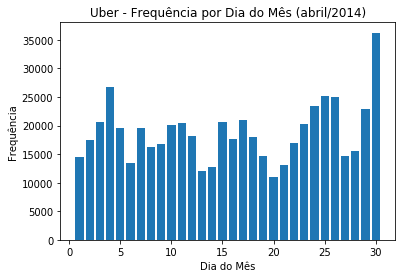

In [73]:
# Análise Dia do Mês

title('Uber - Frequência por Dia do Mês (abril/2014)')
xlabel('Dia do Mês')
ylabel('Frequência')

hist(data.Dia_do_Mes, bins = 30, range = (0.5, 30.5), rwidth = .8)

''

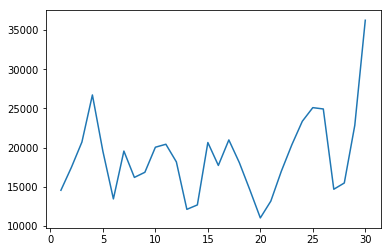

In [86]:
# Função que retorna quantidade de linhas
def cont_linhas(linhas):
    return len(linhas)

# Quantidade por dia do mês
qtd_dia = data.groupby('Dia_do_Mes').apply(cont_linhas)
plot(qtd_dia)
;

''

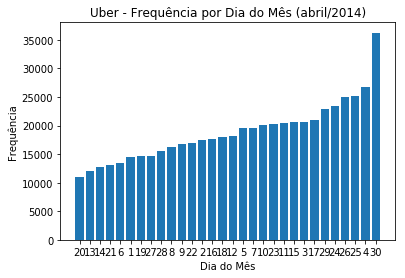

In [71]:
# Quantidade por dia do mês ordenado
qtd_dia_ord = qtd_dia.sort_values()

bar(range(1, 31), qtd_dia_ord)
xticks(range(1, 31), qtd_dia_ord.index)

title('Uber - Frequência por Dia do Mês (abril/2014)')
xlabel('Dia do Mês')
ylabel('Frequência')
;

Text(0,0.5,'Frequência')

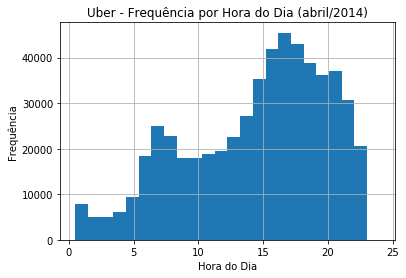

In [110]:
# Análise Hora do Dia

hist(data.Hora_do_Dia, bins = 24, range = (.5, 24))
grid()

title('Uber - Frequência por Hora do Dia (abril/2014)')
xlabel('Hora do Dia')
ylabel('Frequência')

Text(0,0.5,'Frequência')

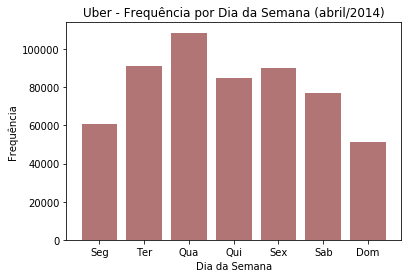

In [84]:
# Análise Dia da Semana

hist(data.Dia_da_Semana, bins = 7, range = (-.5, 6.5), rwidth = .8, color = '#AA6666', alpha = .9)
xticks(range(7), 'Seg Ter Qua Qui Sex Sab Dom'.split())

title('Uber - Frequência por Dia da Semana (abril/2014)')
xlabel('Dia da Semana')
ylabel('Frequência')

In [97]:
# Análise Cross (Hora x Dia da Semana)

cross_hora_dia = data.groupby('Dia_da_Semana Hora_do_Dia'.split()).apply(cont_linhas).unstack()
cross_hora_dia 

Hora_do_Dia,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dia_da_Semana,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


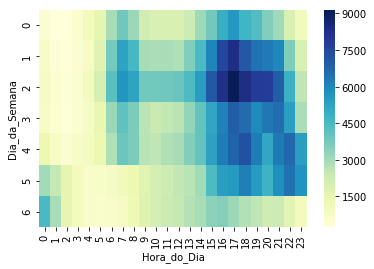

In [98]:
seaborn.heatmap(cross_hora_dia, cmap="YlGnBu")

''

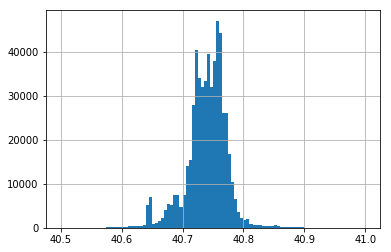

In [111]:
# Análise Latitude x Longitude

hist(data['Lat'], bins = 100, range = (40.5, 41))
grid()
;

''

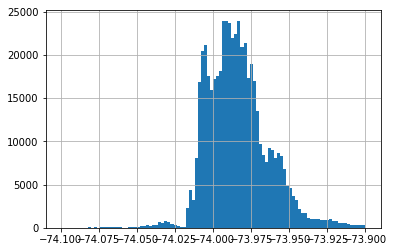

In [112]:
hist(data['Lon'], bins = 100, range = (-74.1, -73.9))
grid()
;

''

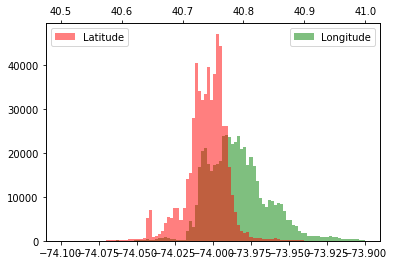

In [117]:
hist(data['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = .5, label = 'Longitude')
legend(loc = 'best')
twiny()
hist(data['Lat'], bins = 100, range = (40.5, 41), color = 'r', alpha = .5, label = 'Latitude')
legend(loc = 'upper left')
;

(40.7, 40.95)

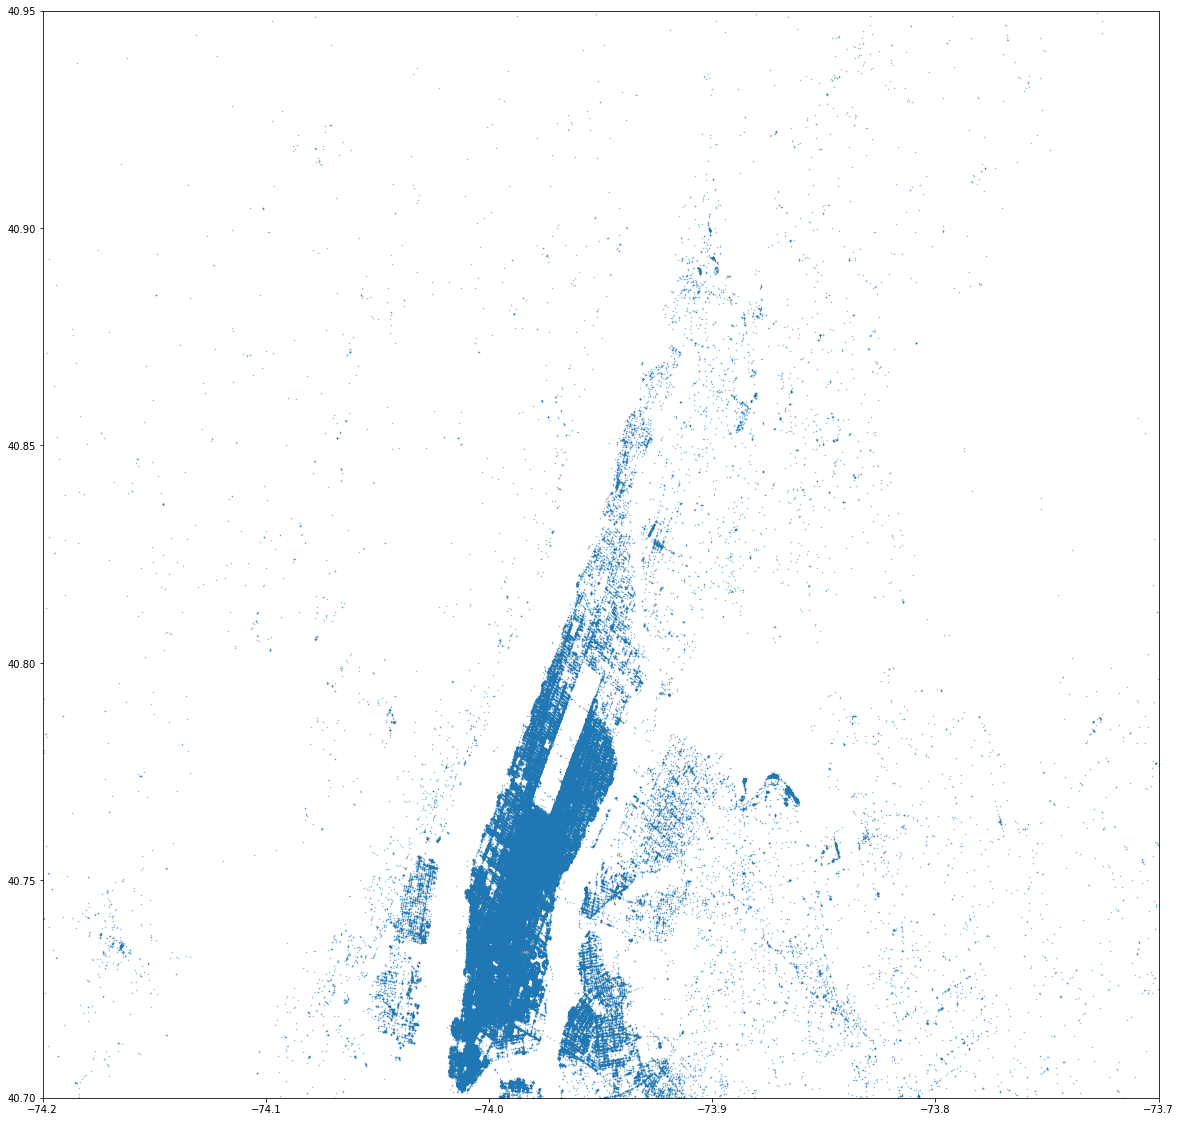

In [123]:
figure(figsize = (20, 20))
plot(data['Lon'], data['Lat'], '.', ms = 1, alpha = .5)
xlim(-74.2, -73.7)
ylim(40.7, 40.95)